# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
# Import relevant libraries


url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html
    


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Import relevant libraries

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')




In [5]:
# Extract all rows of data

table = soup.find('table') 

rows = []

for row in table.find_all('tr'):
    # Extract text from each cell and store it in a list
    cells = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])] 
    rows.append(cells)

df = pd.DataFrame(rows[1:], columns=rows[0])  # The first row is usually the header

# Display the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
column_headers = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    # Extract text from each cell in the row
    cells = [cell.get_text(strip=True) for cell in row.find_all('td')]
    if cells:  # Ensure the row is not empty
        data_rows.append(cells)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=column_headers)
browser.quit()

In [8]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis

df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"], errors='coerce')  

# Convert 'sol', 'ls', 'month' to integer type
df["sol"] = df["sol"].astype(int)
df["ls"] = df["ls"].astype(int)
df["month"] = df["month"].astype(int)

# Convert 'min_temp' and 'pressure' to float type 
df["min_temp"] = df["min_temp"].astype(float)
df["pressure"] = df["pressure"].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
df["month"].max()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
df["sol"].max()-df["sol"].min()

1967

In [14]:
# 3. What is the average minimum temperature by month?
df["min_temp"] = pd.to_numeric(df["min_temp"], errors='coerce')

# Group by 'month' and calculate the mean of 'min_temp'
mars_temp = df.groupby("month")["min_temp"].mean()

# Display the result
mars_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

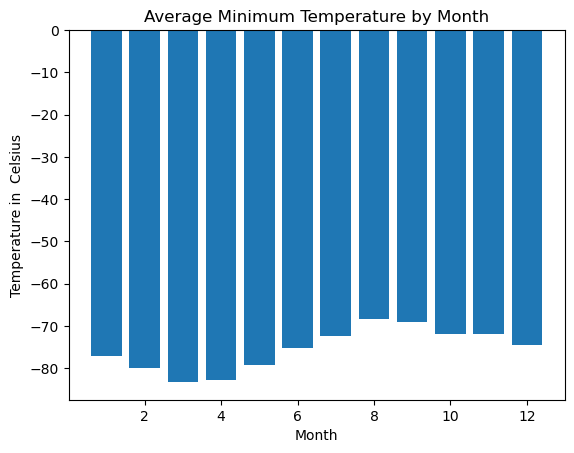

In [15]:
# Plot the average minimum temperature by month
plt.bar(mars_temp.index, mars_temp.values)

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Temperature in  Celsius")
plt.title("Average Minimum Temperature by Month")

# Display the plot
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


In [17]:
# 4. What is the average pressure by month?
df["pressure"] = pd.to_numeric(df["pressure"], errors='coerce')

# Group by 'month' and calculate the mean of 'pressure'
mars_press = df.groupby("month")["pressure"].mean()

# Displaying the result
print(mars_press)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


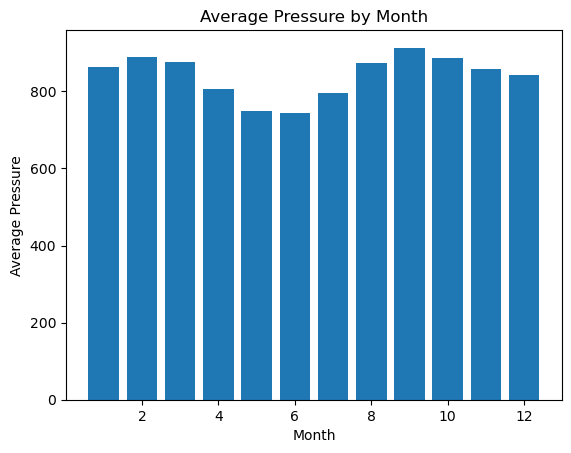

In [18]:
# Plot the average pressure by month

plt.bar(mars_press.index, mars_press.values)

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Month")

# Display the plot
plt.show()

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


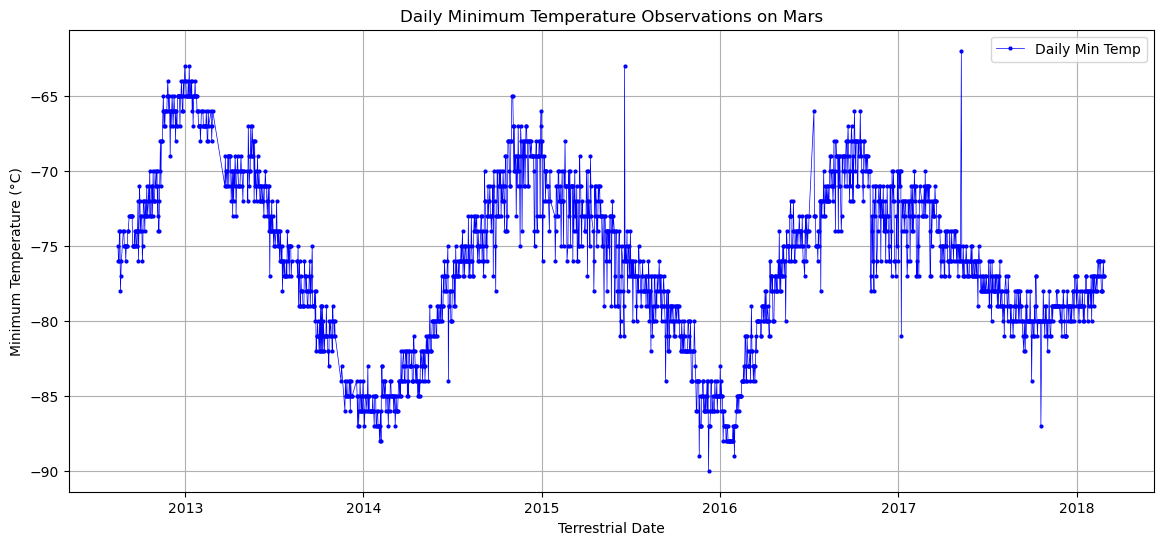

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'terrestrial_date' is in datetime format and 'min_temp' is in numeric format
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"], errors='coerce')
df["min_temp"] = pd.to_numeric(df["min_temp"], errors='coerce')

# Plot daily minimum temperature over terrestrial date to visually estimate Martian year length
plt.figure(figsize=(14, 6))
plt.plot(df["terrestrial_date"], df["min_temp"], marker='o', linestyle='-', markersize=2, linewidth=0.5, color='blue', label='Daily Min Temp')

# Adding labels and title
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature Observations on Mars")

# Show grid for readability
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


Minimum Temperature
Minimum temperature occurs in March and is -83.30

Atmospheric Pressure
Month 9 has the highest pressure at 913 Pa, likely due to colder weather, which compresses the atmosphere. In contrast, Month 6 has the lowest pressure at 745 Pa, due to warmer weather causes CO₂ to evaporate from the polar ice caps, expanding the atmosphere.Therefore Mars has higher pressure in colder months and lower pressure in warmer months.

Year Length
A Martian year is 687 Earth days, resulting in longer seasons and unique weather patterns.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('mars_data.csv')

In [22]:
browser.quit()